In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

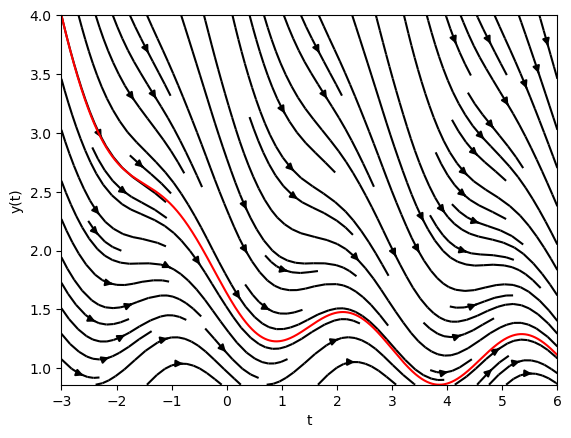

In [38]:
def f(t, y):
    return -0.5 * y + np.sin(t)**2

sol_RK = solve_ivp(f, [-3, 6], [4], max_step = 0.001, method = "RK45")

t, y = np.meshgrid(np.linspace(min(sol_RK.t), max(sol_RK.t), 21),
                   np.linspace(min(sol_RK.y[0]), max(sol_RK.y[0]), 21))

dydt = f(t, y)

plt.streamplot(t, y, np.ones(dydt.shape), dydt, color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.plot(sol_RK.t, sol_RK.y[0], color = "red")
plt.show()

In [43]:
def f(t, y):    
    return y**3 @ np.array([[-0.1, 2.0], [-2.0, -0.1]])

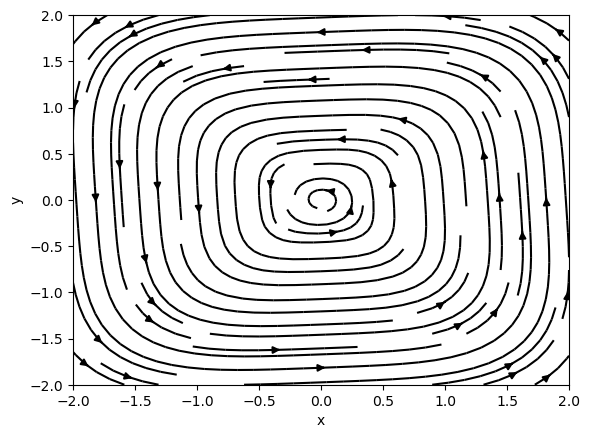

In [44]:
x, y = np.meshgrid(np.linspace(-2, 2, 21),
                   np.linspace(-2, 2, 21))
#print(x, y.shape)
dydt = f(0, (np.stack([x, y], -1).reshape(21 * 21, 2)))
mag = np.sqrt(dydt[:, 0]**2 + dydt[:, 1]**2).reshape(-1, 1) + 0.0001
dydt = (dydt / mag)
dydt = dydt.reshape(21, 21, 2)

plt.streamplot(x, y, dydt[:, :, 0], dydt[:, :, 1], color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()